In [55]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from utils import ALL_LETTERS, N_LETTERS
from utils import load_data, letter_to_tensor, line_to_tensor, random_training_example

In [27]:
class RNN(torch.nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.i2h = torch.nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = torch.nn.Linear(input_size + hidden_size, output_size)
        
        self.softmax = torch.nn.LogSoftmax(dim=1)
        
    def forward(self, input_tensor, hidden_tensor):
        
        combined = torch.cat((input_tensor, hidden_tensor), 1)
        
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        
        return output, hidden
    
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

In [41]:
category_lines, all_categories = load_data()

def category_from_output(output):
    category_idx = torch.argmax(output).item()
    return all_categories[category_idx]

In [63]:
n_categories = len(all_categories)

#Hyperparameter, number of outputs in hidden layer 
n_hidden = 128

rnn = RNN(N_LETTERS, n_hidden, n_categories)


criterion = torch.nn.NLLLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(rnn.parameters(), lr = learning_rate)

In [64]:
def train(line_tensor, category_tensor):
    hidden = rnn.init_hidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    loss = criterion(output, category_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return output, loss.item()

4999 5.0 2.3536 Peisar / German WRONG (Czech)
9999 10.0 3.1783 Buck / Korean WRONG (English)
14999 15.0 1.2919 Guo / Korean WRONG (Chinese)
19999 20.0 1.6496 Rim / Korean CORRECT
24999 25.0 1.7795 Gordon / Scottish CORRECT
29999 30.0 2.9757 Ashdown / Japanese WRONG (English)
34999 35.0 1.4294 Ruiz / Spanish CORRECT
39999 40.0 2.0213 Lauwens / Scottish WRONG (Dutch)
44999 45.0 3.1382 Medina / Irish WRONG (Spanish)
49999 50.0 2.1872 Siegel / Czech WRONG (German)
54999 55.0 1.6838 Bawin / Irish WRONG (Russian)
59999 60.0 0.5918 Perez / Spanish CORRECT
64999 65.0 0.8085 Mei / Chinese CORRECT
69999 70.0 0.4607 Mazaki / Japanese CORRECT
74999 75.0 0.2022 Coelho / Portuguese CORRECT
79999 80.0 0.9824 Slazak / Czech WRONG (Polish)
84999 85.0 4.2001 Aodha / Arabic WRONG (Irish)
89999 90.0 0.5406 Atshushi / Japanese CORRECT
94999 95.0 1.3365 Nelms / English CORRECT
99999 100.0 1.6670 Burn / German WRONG (English)


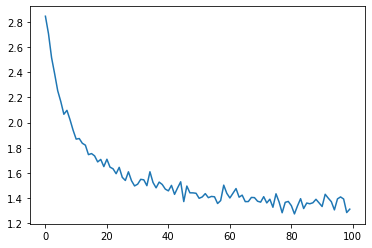

In [65]:
current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000
n_iters = 100000

for i in range(n_iters):
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)
    
    output, loss = train(line_tensor, category_tensor)
    current_loss += loss
    
    if (i+1) % plot_steps == 0:
        all_losses.append(current_loss / plot_steps)
        current_loss = 0
        
    if (i+1) % print_steps == 0:
        guess = category_from_output(output)
        correct = "CORRECT" if guess == category else f"WRONG ({category})"
        print(f"{i} {i/n_iters*100:.1f} {loss:.4f} {line} / {guess} {correct}")
        
plt.figure()
plt.plot(all_losses)
plt.show()

In [57]:
def predict(input_line):
    with torch.no_grad():
        line_tensor = line_to_tensor(input_line)
        
        hidden = rnn.init_hidden()
        for i in range(line_tensor.size()[0]):
            output, hidden = rnn(line_tensor[i], hidden)
            
        gess = category_from_output(output)
        return gess

In [66]:
predict('Sara')

'Japanese'